In [309]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [310]:
df = pd.read_csv("ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# Data preprocessing

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [312]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [313]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [314]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [315]:
df.shape

(3755, 11)

Rename categorical column values for better understanding

In [316]:
df["experience_level"].value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [317]:
df['experience_level'] = df['experience_level'].replace({'SE':'Senior', 'MI':'Mid-level', 'EN':'Entry-level','EX':'Executive-level'})

In [318]:
df['employment_type'].value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [319]:
df['employment_type'] = df['employment_type'].replace({'FT':'Full-time', 'CT':'Contractual','PT':'Part-time', 'FL':'Freelancer'})

In [320]:
df['remote_ratio'].value_counts()

0      1923
100    1643
50      189
Name: remote_ratio, dtype: int64

In [321]:
df['remote_ratio'] = df['remote_ratio'].replace({100: 'On-site', 0:'Remote', 50:'Hybrid'})

In [322]:
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2230,2022,Senior,Full-time,Data Scientist,175000,USD,175000,US,On-site,US,M
529,2023,Senior,Full-time,Machine Learning Engineer,216000,USD,216000,US,On-site,US,M
2721,2022,Entry-level,Full-time,AI Scientist,50000,USD,50000,US,On-site,US,M
3561,2021,Entry-level,Full-time,Data Science Consultant,65000,EUR,76833,DE,On-site,DE,S
2988,2022,Senior,Full-time,Data Engineer,135000,USD,135000,US,On-site,US,M


check for duplicates

In [323]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(1171, 11)

In [324]:
#keep only the first row of the duplicated rows
df = df.drop_duplicates(keep='last')

In [325]:
df.shape

(2584, 11)

In [326]:
df.corr()['salary_in_usd']

/tmp/ipykernel_4820/4269169017.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



work_year        0.236958
salary          -0.043672
salary_in_usd    1.000000
Name: salary_in_usd, dtype: float64

In [327]:
df[df['employee_residence']==df['company_location']]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,On-site,ES,L
1,2023,Mid-level,Contractual,ML Engineer,30000,USD,30000,US,On-site,US,S
2,2023,Mid-level,Contractual,ML Engineer,25500,USD,25500,US,On-site,US,S
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,On-site,CA,M
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,On-site,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,On-site,US,L
3751,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,US,On-site,US,L
3752,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,US,On-site,US,S
3753,2020,Entry-level,Contractual,Business Data Analyst,100000,USD,100000,US,On-site,US,L


In [328]:
df.loc[(df['employee_residence']!=df['company_location']),'stranger']=1
df.loc[(df['employee_residence']==df['company_location']),'stranger']=0

In [329]:
df = df.drop(['salary_currency', 'salary'], axis=1)

In [330]:
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,stranger
3028,2022,Senior,Full-time,Data Scientist,205000,US,Remote,US,M,0.0
62,2023,Senior,Full-time,Data Scientist,172500,US,On-site,US,M,0.0
3136,2022,Senior,Full-time,Machine Learning Engineer,202900,US,On-site,US,L,0.0
2272,2022,Senior,Full-time,Data Engineer,106800,US,Remote,US,M,0.0
945,2023,Senior,Full-time,Data Analyst,90000,US,On-site,US,M,0.0


# Data visualization

/tmp/ipykernel_4820/3962080906.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



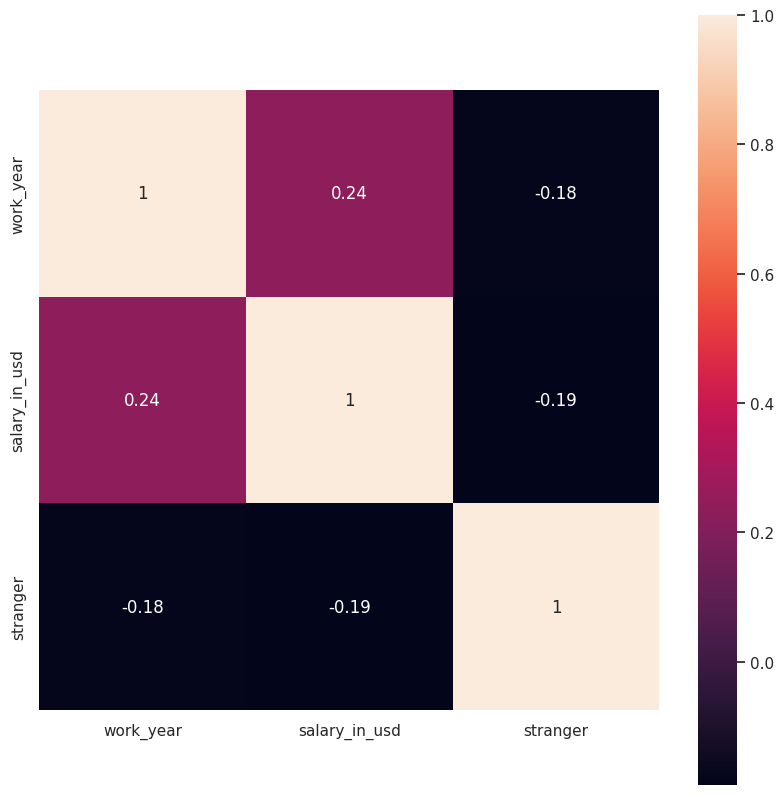

In [331]:
correlation = df.corr()
fig_corr= plt.gcf();
fig_corr.set_size_inches(10,10);
sns.heatmap(correlation,annot = True, square = True)

plt.show()

In [332]:
# Job titles and associated average salary
top_salary =  df.groupby('job_title').agg({'salary_in_usd':'mean'}).round(2).sort_values('salary_in_usd', ascending=False).head(10)
top_salary.head(10)

,salary_in_usd
job_title,
Data Science Tech Lead,375000.00
Cloud Data Architect,250000.00
Data Lead,212500.00
Data Analytics Lead,211254.50
Principal Data Scientist,198171.12
Director of Data Science,195140.73
Principal Data Engineer,192500.00
Machine Learning Software Engineer,192420.00
Applied Scientist,190342.58


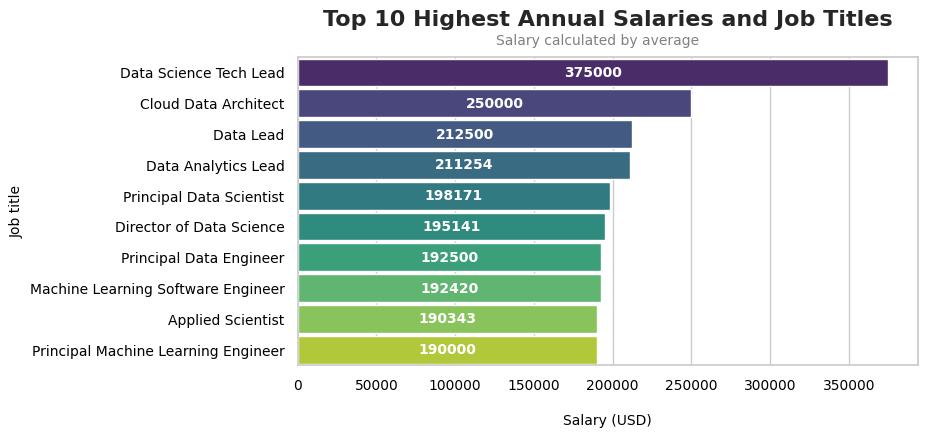

In [333]:
plt.figure(figsize=(8,4))

sns.set(style="whitegrid")
ax= sns.barplot(y = top_salary.index, x ='salary_in_usd', 
            data = top_salary,           
            palette = "viridis",
            width=0.9)
            
plt.title('Top 10 Highest Annual Salaries and Job Titles\n', fontsize=16, fontweight="bold", loc="center")
plt.suptitle("\nSalary calculated by average\n", fontsize = 10, color="gray")
plt.xlabel('\nSalary (USD)', color="black", fontsize=10)
plt.ylabel('Job title', color="black", fontsize=10)
plt.xticks(fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")

for i in ax.containers:
    ax.bar_label(i, size=10, label_type = "center", color="white", fontweight="bold")

plt.show() #not needed in Jupyter environment but this opens the plot in another window in other environments

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.]),
 [Text(0, -100000.0, '−100000'),
  Text(0, 0.0, '0'),
  Text(0, 100000.0, '100000'),
  Text(0, 200000.0, '200000'),
  Text(0, 300000.0, '300000'),
  Text(0, 400000.0, '400000'),
  Text(0, 500000.0, '500000')])

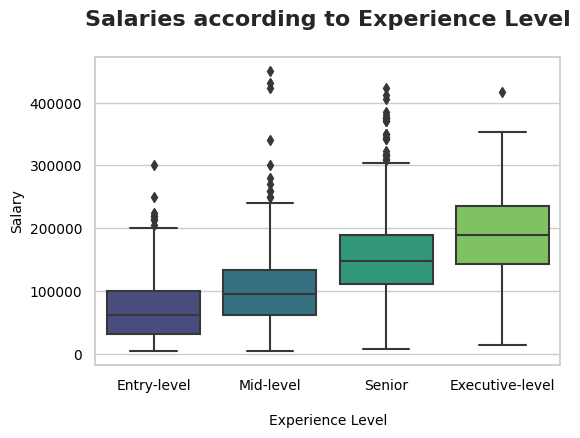

In [334]:
plt.figure(figsize=(6,4))

median_salary = df.groupby('experience_level')['salary_in_usd'].median().reset_index().sort_values('salary_in_usd')

sns.boxplot(data=df, x='experience_level', y='salary_in_usd', 
            order=median_salary['experience_level'], 
            palette="viridis")

plt.title("Salaries according to Experience Level\n", fontsize=16, fontweight="bold", loc="center")
plt.xlabel("\nExperience Level", color="black", fontsize=10)
plt.ylabel("Salary", color="black", fontsize=10)
plt.xticks(fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")

In [335]:
df['work_year'].value_counts()

2023    1156
2022    1125
2021     228
2020      75
Name: work_year, dtype: int64

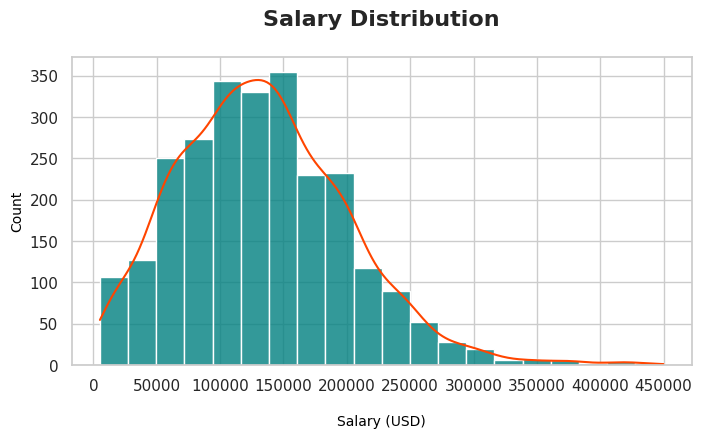

In [336]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,4))

ax = sns.histplot(df['salary_in_usd'], alpha=0.8, color = "teal", bins=20,
             kde = True)

plt.xticks(range(0,500000,50000));
plt.title("Salary Distribution\n", fontsize=16, fontweight = "bold")
plt.xlabel('\nSalary (USD)', color="black",fontsize=10)
plt.ylabel('Count', color = "black", fontsize=10)
ax.lines[0].set_color('orangered') #change color of kde line
#ax.lines[0].set_dashes((5,2))

In [337]:
job_type = df.groupby('employment_type').agg({'salary_in_usd':'mean'}).round(0).sort_values('salary_in_usd', ascending=False)

job_type

,salary_in_usd
employment_type,
Full-time,134435.0
Contractual,113447.0
Freelancer,51808.0
Part-time,39534.0


In [338]:
import plotly.express as px

fig = px.scatter(job_type, x="salary_in_usd", y=None,
                 size="salary_in_usd", color=job_type.index,
                 size_max=60)

fig.update_layout(yaxis=dict(title=''), xaxis=dict(title='\nAvg. Annual Salary'), title={'text':'Job Type and Average Salary', 'font':{'size':22}})
fig.update_xaxes(range=[5000, 150000], dtick=10000)
fig.update_layout(width=800, height=400)

fig.show()

<Figure size 800x400 with 0 Axes>

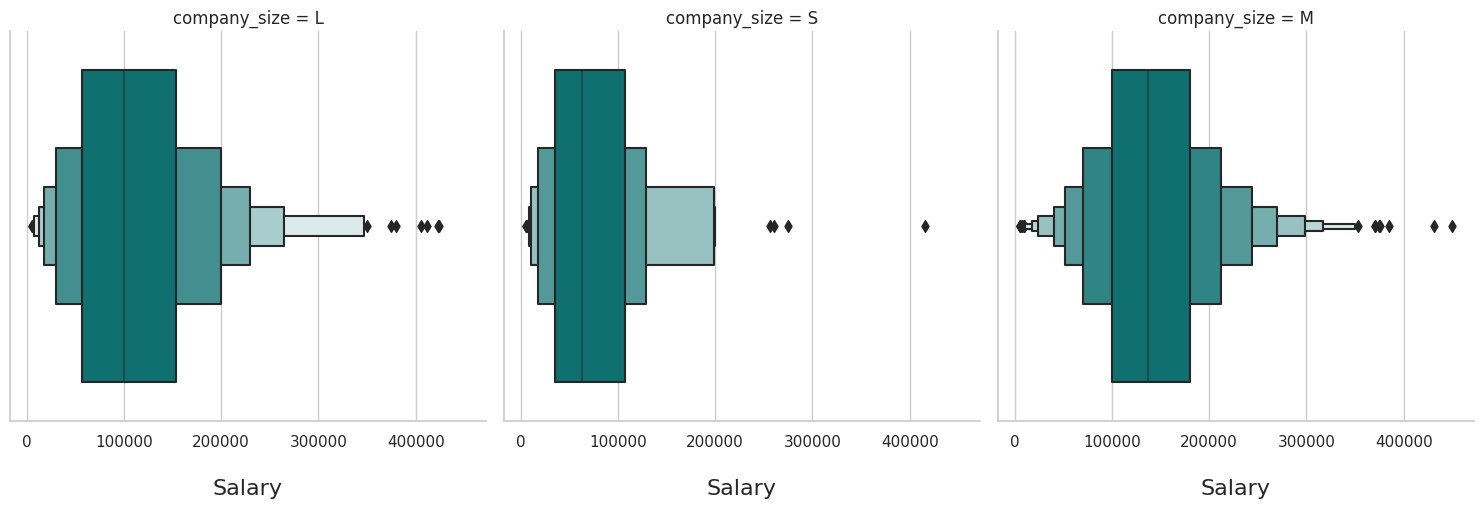

In [339]:
plt.figure(figsize=(8,4))

ax = sns.catplot(data=df, x='salary_in_usd',  col='company_size', kind='boxen', color="teal")

ax.set_xlabels("\nSalary", fontsize =16)
plt.xticks(range(0,500000,100000));

In [340]:
print("Salary according to company size \n")
round(df.groupby('company_size').agg({'salary_in_usd':'mean'}),2)

Salary according to company size 



,salary_in_usd
company_size,
L,113202.24
M,141474.51
S,78364.28


In [341]:
print("Minimum salary: $", df.salary_in_usd.min(),"\nAverage salary: $", round(df.salary_in_usd.mean(),2), "\nMaximum salary: $", df.salary_in_usd.max()) 

Minimum salary: $ 5132 
Average salary: $ 133409.28 
Maximum salary: $ 450000


Text(0.5, 1.0, 'Work Mode\n')

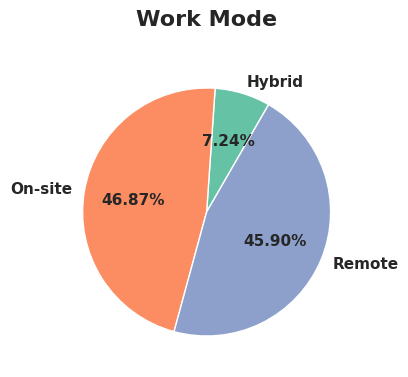

In [342]:
plt.figure(figsize=(4,6))
colors = sns.color_palette('Set2')[0:3]

values = df.groupby('remote_ratio').size()
labels = values.index
#round(values/values.sum()*100, 2)

plt.pie(values, labels=labels, autopct='%1.2f%%', 
             startangle=60, textprops={'fontsize': 11, 'fontweight':"bold"},
             colors = colors)
plt.title("Work Mode\n", fontsize=16, fontweight="bold")

In [343]:
df_pivot = df.groupby(['company_location', 'remote_ratio']).size().reset_index(name="count")
df_pivot = df_pivot.pivot_table(index='company_location', columns='remote_ratio', values='count', fill_value=0)
df_pivot.sort_values('Remote', ascending=False).head(10)

remote_ratio,Hybrid,On-site,Remote
company_location,,,
US,39,917,973
GB,17,55,83
CA,12,44,27
ES,5,21,18
DE,14,25,16
IN,20,29,8
PT,3,4,7
IE,0,3,4
NL,3,6,4


<Axes: xlabel='count', ylabel='job_title'>

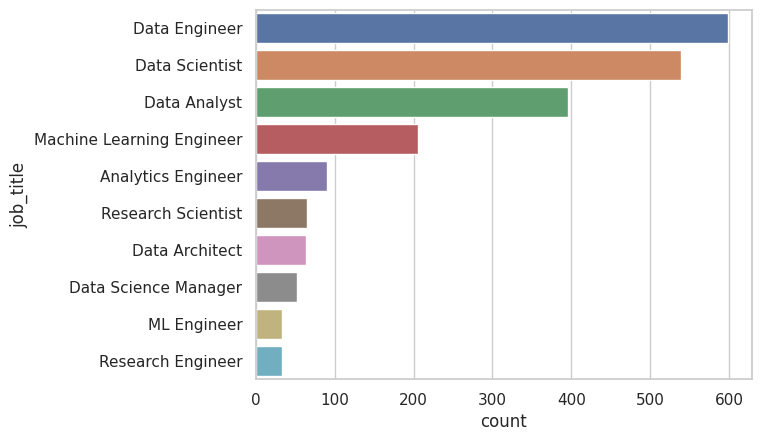

In [344]:
sns.countplot(y=df['job_title'],order=df['job_title'].value_counts().head(10).index)

# split the dataset into train and test

In [345]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', 'stranger'],
      dtype='object')

In [346]:
#create copy of dataset
df_copy = df

df_copy.shape

(2584, 10)

In [347]:
#Remove outliers
Q1 = df_copy['salary_in_usd'].quantile(0.25)
Q3 = df_copy['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
df_copy = df_copy[~((df_copy['salary_in_usd']< (Q1 - 1.5 * IQR)) | (df_copy['salary_in_usd'] > (Q3 + 1.5 * IQR)))]
df_copy.shape

(2555, 10)

In [348]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           2555 non-null   int64  
 1   experience_level    2555 non-null   object 
 2   employment_type     2555 non-null   object 
 3   job_title           2555 non-null   object 
 4   salary_in_usd       2555 non-null   int64  
 5   employee_residence  2555 non-null   object 
 6   remote_ratio        2555 non-null   object 
 7   company_location    2555 non-null   object 
 8   company_size        2555 non-null   object 
 9   stranger            2555 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 219.6+ KB


In [349]:
categorical_vars = ['experience_level','job_title' ,'company_location','company_size','employment_type','employee_residence','remote_ratio']
numeric_vars = ['salary_in_usd']

In [350]:
from sklearn.preprocessing import LabelEncoder

for i in categorical_vars:
    le=LabelEncoder()
    df_copy[i]=le.fit_transform(df_copy[i])

/tmp/ipykernel_4820/3958186512.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4820/3958186512.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4820/3958186512.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4820

In [351]:
X = df_copy.drop(columns=['salary_in_usd','employee_residence','remote_ratio'], axis=1)
#X = df_copy[categorical_vars].copy().reset_index(drop=True)

X.head()

,work_year,experience_level,employment_type,job_title,company_location,company_size,stranger
0,2023,3,2,83,25,0,0.0
1,2023,2,0,65,70,2,0.0
2,2023,2,0,65,70,2,0.0
3,2023,3,2,46,12,1,0.0
4,2023,3,2,46,12,1,0.0


In [352]:
y = df_copy[numeric_vars]
y.head()

,salary_in_usd
0,85847
1,30000
2,25500
3,175000
4,120000


In [353]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [354]:
y

,salary_in_usd
0,85847
1,30000
2,25500
3,175000
4,120000
...,...
3749,165000
3751,151000
3752,105000
3753,100000


# Train the model

In [355]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

Train the decision tree with depth 2

In [356]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [357]:
len(X_train)

2044

In [358]:
# Step 3: Evaluate the decision tree model
y_pred_dt = tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.0136986301369863


In [359]:
# Step 4: Extract data points in leaf nodes
leaf_indices = tree.apply(X_train)

In [360]:
data_indices = np.where(leaf_indices == leaf_index)[0]

In [361]:
data_indices

array([   2,    7,    9, ..., 2041, 2042, 2043])

In [362]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Step 5: Train an arbitrary algorithm (Naive Bayes) on leaf node data subsets
secondary_model = GaussianNB()
for leaf in set(leaf_indices):
    leaf_data = X_train.iloc[leaf_indices == leaf]
    leaf_labels = y_train.iloc[leaf_indices == leaf]
    secondary_model.partial_fit(leaf_data, leaf_labels, classes=np.unique(y_train))

/home/asus/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/asus/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/asus/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/asus/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [363]:
lop = []
leaf_indices = tree.apply(X_test)
data_indices = np.where(leaf_indices == leaf_index)[0]
for leaf in set(leaf_indices):
    leaf_data = X_test.iloc[leaf_indices == leaf]
    leaf_labels = y_test.iloc[leaf_indices == leaf]
    result = secondary_model.predict(leaf_data)
    accuracy_secondary = accuracy_score(leaf_labels, result)
    lop.append(accuracy_secondary)

In [364]:
np.mean(lop)

0.5